<a href="https://colab.research.google.com/github/Andresmps/Course-test/blob/master/Problema_de_los_cuatro_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install geopandas

     |████████████████████████████████| 972kB 5.2MB/s 
     |████████████████████████████████| 6.5MB 8.0MB/s 
     |████████████████████████████████| 14.8MB 291kB/s 


In [15]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np

In [16]:
 world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
 cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [ ]:
world['color'] = [i*100 for i in range(world.shape[0])]

<Figure size 432x288 with 0 Axes>

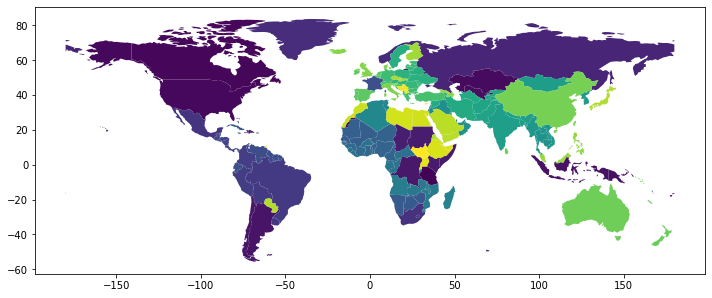

In [ ]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='color', figsize=(12,12))

## ¿Can you paint the above map with a pre-defined number of color, for example *4*?
---


In [57]:
colors = [chr(27)+f"[0;{str(i)}m" for i in range(40, 47)]
colors.extend([chr(27)+f"[0;{str(i)}m" for i in range(30, 37)])
colors.extend([chr(27)+f"[0;{str(i)}m" for i in range(90, 98)])
colors.extend([chr(27)+f"[0;{str(i)}m" for i in range(100, 107)])

In [58]:
def color_matrix(n, colors_):
    marks = np.zeros((n, n))
    marks -= 1
    for i in range(n):
        for j in range(n):
            i_ = np.random.randint(len(colors_))
            marks[i, j] = i_

            while ((i > 0 and marks[i, j] == marks[i-1, j]) or
                (i < n-1 and marks[i, j] == marks[i+1, j]) or
                (j > 0 and marks[i, j] == marks[i, j-1]) or
                (j < n-1 and marks[i, j] == marks[i, j+1])):
                i_ = np.random.randint(len(colors_))
                marks[i, j] = i_

            print(f"{colors_[i_]} {i_} ", end='')
        print()

In [59]:
color_matrix(10, colors[:10])

 3  6  5  3  0  3  4  1  8  6 
 0  5  8  7  2  1  0  7  6  3 
 9  3  7  4  0  3  7  0  7  2 
 6  2  5  8  4  0  5  2  0  1 
 3  9  8  9  2  1  0  7  6  0 
 0  5  2  1  4  2  6  0  3  6 
 7  2  0  5  1  7  9  7  4  2 
 0  4  3  4  3  2  6  0  9  3 
 4  2  0  6  7  9  3  9  7  0 
 0  3  5  0  8  1  2  6  5  6 


In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import HTML

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [24]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [173]:
import numpy as np
import networkx as nx

def euclidean_distance(p1, p2):
    return np.sqrt((p1.x - p2.x) - (p1.y - p2.y))


def get_countries(n):
    if (n > 150) or (n <= 0):
        n = 10
    path = 'naturalearth_lowres'
    countries = geopandas.read_file(geopandas.datasets.get_path(path))
    countries['color'] = [i+1 for i in range(countries.shape[0])]
    countries['pop_est'].astype(float)
    size_ = countries.shape[0]
    countries.loc[np.random.randint(size_, size=n), 'pop_est'] = None
    return countries


def add_countries_as_nodes(G, countries):
    H = G.copy()
    country_names = []
    for i in range(countries.shape[0]):
        country = countries.iloc[i]
        if str(country['pop_est']) != 'nan':
            # print(str(country['pop_est']))
            country_names.append(i)
    print(len(country_names))
    H.add_nodes_from(country_names)
    return H


def add_relations(G, n):
    if n <= 2:
        n = 5
    H = G.copy()
    country_relations = []
    for i in range(n):
        v1 = np.random.choice(H.nodes)
        v2 = np.random.choice(H.nodes)
        while v1 == v2:
            v2 = np.random.choice(H.nodes)
        country_relations.append((v1, v2))

    print(len(country_relations))
    H.add_edges_from(country_relations)
    return H


In [258]:
countries = get_countries(20)
print(countries.shape)
countries.head(2)

(177, 7)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,color
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2


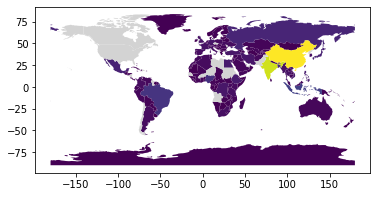

In [259]:
countries.plot(column='pop_est',
               missing_kwds={'color': 'lightgrey'})

In [260]:
G = nx.Graph()

In [261]:
countries.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,color
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2


In [264]:
H = add_countries_as_nodes(G, countries)

157


In [265]:
H1 = add_relations(H, 20)

20


In [266]:
H1.edges

EdgeView([(5, 165), (9, 168), (11, 148), (12, 105), (13, 130), (13, 134), (15, 112), (16, 100), (36, 61), (45, 93), (50, 54), (59, 120), (59, 76), (60, 108), (62, 136), (72, 110), (73, 129), (85, 135), (98, 156), (136, 150)])

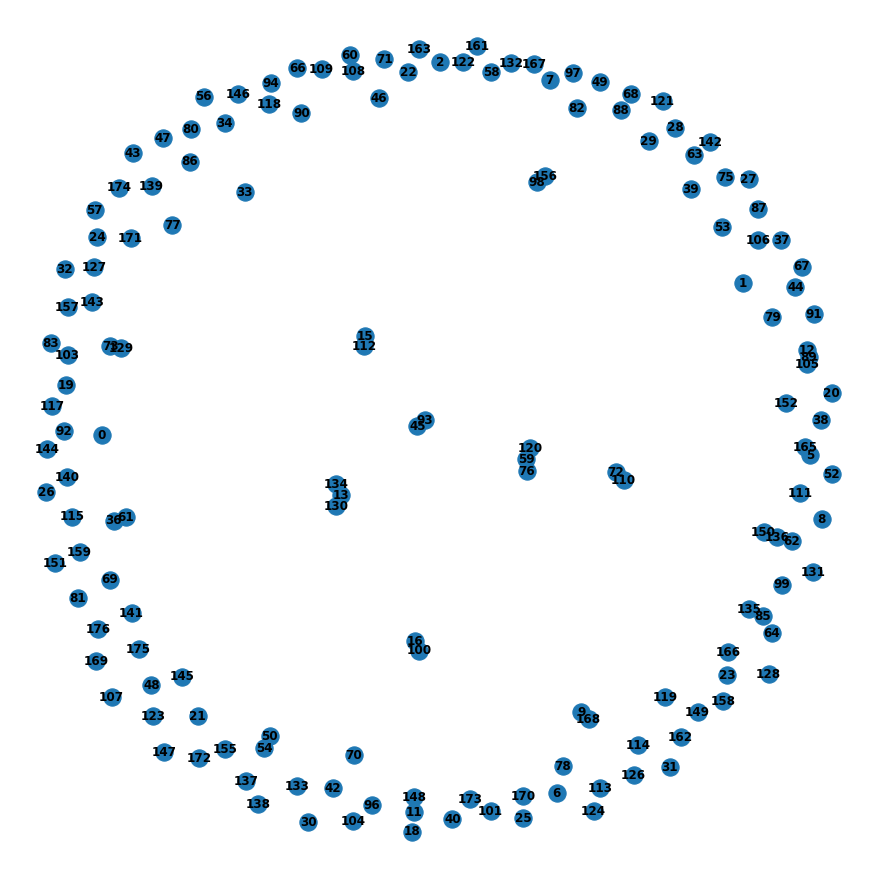

In [267]:
plt.figure(figsize=(12, 12))
nx.draw(H1, with_labels=True, font_weight='bold')

In [119]:
# world.plot()  #['name'].unique() #.plot(color='white', edgecolor='black')

# c.plot(column='pop_est', figsize=(12,12), missing_kwds={'color': 'lightgrey'})

0
0
0


0

In [247]:
# c['pop_est'].unique()

In [40]:
# world#['continent'].unique()
p1 = cities['geometry'].iloc[0] #['name'].unique()
p2 = cities['geometry'].iloc[1] #['name'].unique()

euclidean_distance(p1, p2)

1.4298356695716865

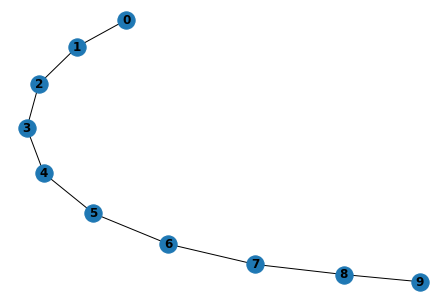

In [43]:
nx.draw(nx.path_graph(10), with_labels=True, font_weight='bold')
